# Ultimate Challenge

## Part 1 - Exploratory Data Analysis

In [1]:
import pandas as pd

# Load the data
data = pd.read_json('logins.json')

# Display the first few rows of the data
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


The data consists of a single column labeled "login_time", which represents the timestamp of each user login. To continue with the exploratory data analysis, I will aggregate these login counts based on 15-minute time intervals and then visualize the resulting time series.

In [2]:
# Set login_time as the index and sort it
data.set_index('login_time', inplace=True)
data['count'] = 1

# Resample in 15 minute time intervals
data_resampled = data.resample('15T').sum()

# Display the first few rows of the resampled data
data_resampled.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


The data has been successfully resampled into 15-minute intervals. The 'count' column represents the number of logins within each 15-minute interval. Now, I will plot this data to observe patterns and cycles in the login activity.

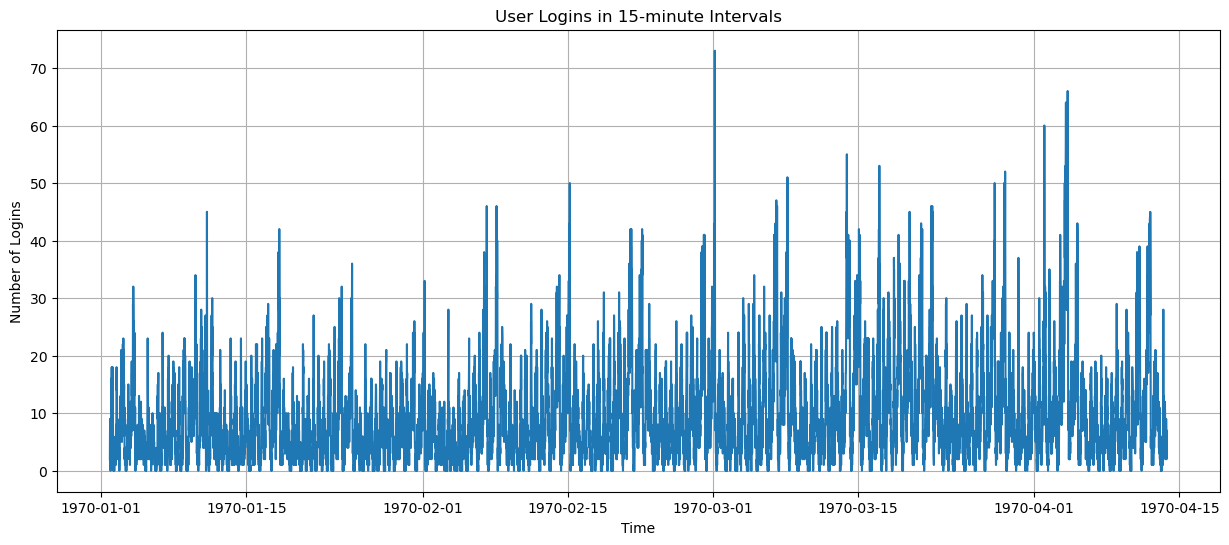

In [3]:
import matplotlib.pyplot as plt

# Plot the time series data
plt.figure(figsize=(15,6))
plt.plot(data_resampled.index, data_resampled['count'])
plt.title('User Logins in 15-minute Intervals')
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.grid(True)
plt.show()

From the plot, it is clear that there are recurring peaks and valleys in the number of logins, which suggests a cyclical pattern in the user activity.

To further understand these cycles, we should break down the time series into daily and weekly components. This will allow us to observe any daily or weekly patterns in the login activity.

Let's further analyze this data by examining the average number of logins for each hour of the day and each day of the week.

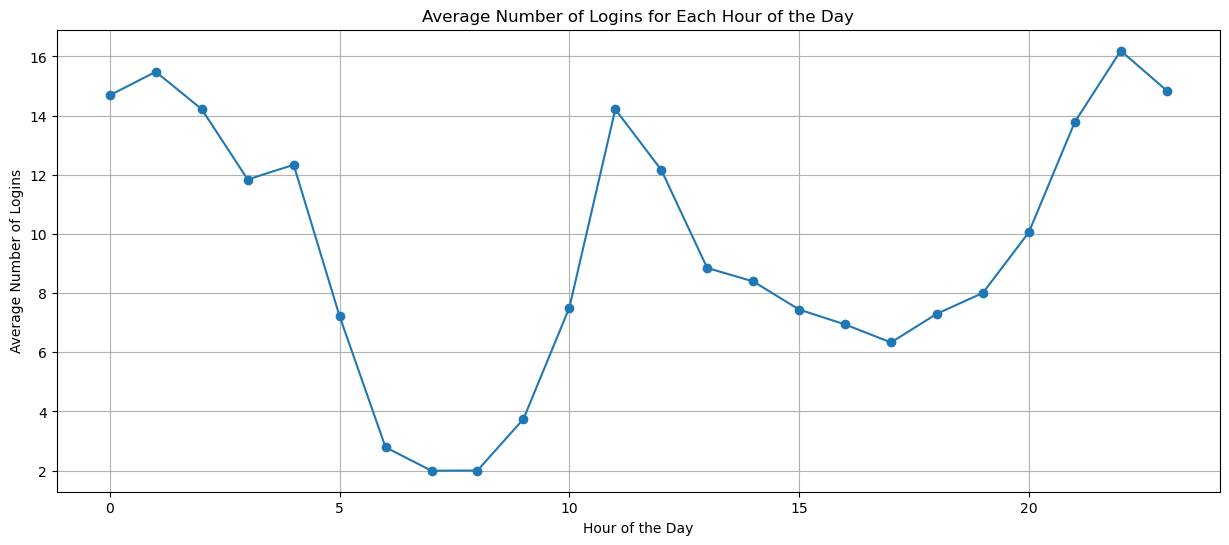

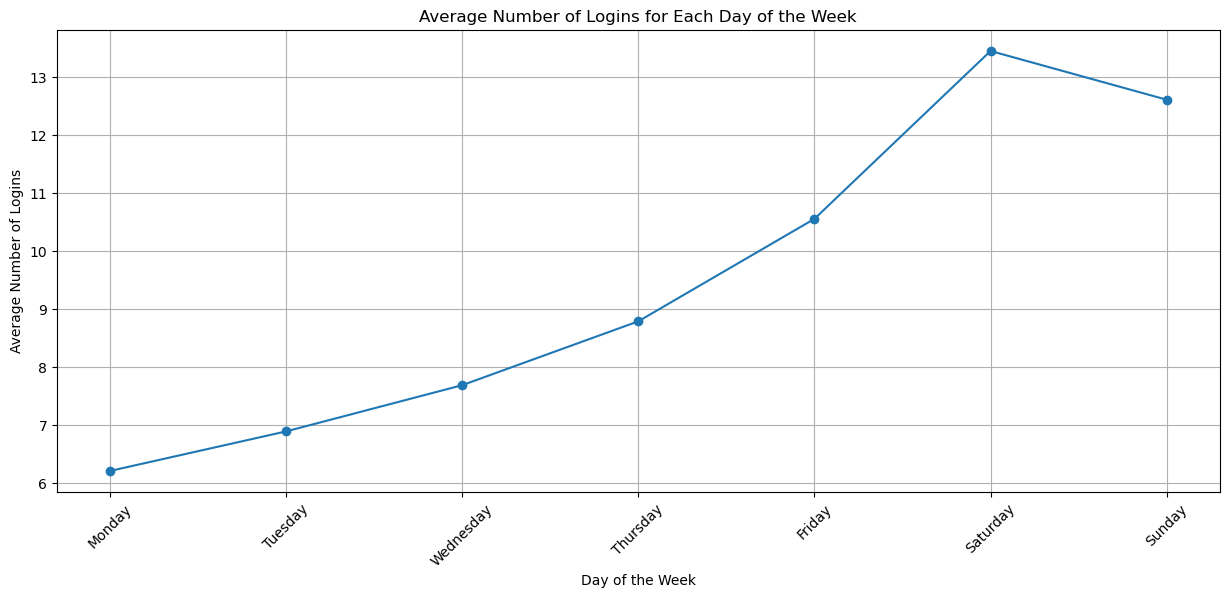

In [4]:
# Add columns for the hour of the day and day of the week
data_resampled['hour'] = data_resampled.index.hour
data_resampled['day'] = data_resampled.index.day_name()

# Compute the average number of logins for each hour of the day and day of the week
avg_hourly_logins = data_resampled.groupby('hour')['count'].mean()
avg_daily_logins = data_resampled.groupby('day')['count'].mean()

# Order the days of the week starting with Monday
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_daily_logins = avg_daily_logins.loc[order]

# Plot the average hourly logins
plt.figure(figsize=(15,6))
plt.plot(avg_hourly_logins.index, avg_hourly_logins.values, marker='o')
plt.title('Average Number of Logins for Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Logins')
plt.grid(True)
plt.show()

# Plot the average daily logins
plt.figure(figsize=(15,6))
plt.plot(avg_daily_logins.index, avg_daily_logins.values, marker='o')
plt.title('Average Number of Logins for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Logins')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

The first plot, "Average Number of Logins for Each Hour of the Day", reveals the following patterns:

- The demand is highest in the late night (around 22:00) and early morning hours (around 1:00 to 2:00). This might be due to people logging in after dinner time or after finishing late-night activities.
- There is another smaller peak in the late morning (around 11:00), which could be due to people logging in during their break hours.
- The demand is lowest in the early morning (around 6:00 to 8:00), likely when most people are asleep or just starting their day.

The second plot, "Average Number of Logins for Each Day of the Week", illustrates the following trends:

- The demand gradually increases from Monday to Saturday, with the highest demand on Saturday.
- The demand slightly decreases on Sunday compared to Saturday, but it's still higher than the weekdays.

Regarding data quality, there don't appear to be any missing or inconsistent timestamps that would indicate data quality issues based on this initial analysis.

Part 2 ‐ Experiment and metrics design

1. A suitable key measure of success for this experiment could be the change in the number of trips that originate in one city and terminate in the other. If the toll reimbursement is successful, we should expect to see an increase in these cross-city trips as drivers no longer have a financial disincentive to serve both cities. This measure directly reflects the goal of the experiment, which is to encourage driver partners to serve both cities.
2. 
 a) To implement the experiment, we could proceed as follows:

- Start by collecting data on the number of cross-city trips made by each driver over a certain period (e.g., one month) before the toll reimbursement policy is implemented. This will serve as our baseline data.
- Implement the toll reimbursement policy.
- Continue to collect data on the number of cross-city trips made by each driver after the policy is implemented over the same length of time as the baseline data collection.
- Compare the pre- and post-reimbursement data to see if there is a significant increase in the number of cross-city trips.
 
 b) The appropriate statistical test would be a paired sample t-test. This test is suitable because we are  comparing the means of the same group (the drivers) before and after a certain intervention (the toll reimbursement).

 c) If the p-value from the t-test is less than a chosen significance level (commonly 0.05), we would reject the null hypothesis (that the policy has no effect) and conclude that the toll reimbursement policy has a significant effect on the number of cross-city trips. If the p-value is greater than the significance level, we would not reject the null hypothesis, indicating that the policy doesn't have a significant effect.

Caveats:

- It's important to note that even if we find a significant effect, this doesn't necessarily mean that the policy is beneficial. We would need to consider the costs of reimbursing the tolls and compare them to any benefits gained from increased cross-city trips (e.g., increased revenue, customer satisfaction).
- Additionally, other factors could influence the number of cross-city trips, and these factors might change over the time of the experiment. For instance, seasonal variations or changes in other policies could also impact the results. It would be essential to consider these factors when interpreting the results.
- The experiment assumes that the drivers' behavior is primarily influenced by the toll costs. If there are other significant barriers to serving both cities that are not addressed, the policy may not be effective.
- Finally, it would be important to monitor the effects of the policy over alonger term. For example, drivers might initially increase their cross-city trips due to the novelty of the policy, but this effect might wear off over time. Conversely, it might take some time for drivers to adjust their behavior in response to the policy, so the full effects might not be apparent immediately. Therefore, ongoing monitoring and analysis would be necessary to fully understand the impact of the policy.

## Part - 3 Predictive Modeling

Let's perform some initial data cleaning and exploratory analysis. This will include:

1. Checking for null values and deciding how to handle them.
2. Converting signup_date and last_trip_date to datetime format if they are not already.
3. Checking the unique values of categorical features like city and phone.
4. Creating a target variable for user retention. According to the problem statement, a user is considered "retained" if they have taken a trip in the last 30 days. We need to identify the date of the last trip in the data, then mark users who have taken a trip in the 30 days preceding that date as "retained".

In [11]:
import pandas as pd

# Load the data
data = pd.read_json('ultimate_data_challenge.json')

# Check the first few rows
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [12]:
# Check for null values
data.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

The avg_rating_of_driver column has 8122 missing values, and avg_rating_by_driver has 201 missing values. Since these are ratings, it's possible that not all rides resulted in a rating. One approach to handle these missing values would be to fill them with the mean or median of the respective column. However, it's worth noting that this could introduce some bias into the analysis, as we're essentially assuming these unrated rides would have average ratings.

The phone column also has 396 missing values. Given that this is a categorical variable, we could potentially fill in the missing values with the most common category (mode), or create a new category, such as "Unknown".

Let's move to converting the signup_date and last_trip_date columns to datetime format, and checking the unique values for categorical features.

In [13]:
# Convert `signup_date` and `last_trip_date` to datetime format
data['signup_date'] = pd.to_datetime(data['signup_date'])
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])

# Check unique values for categorical features
print("Unique values for 'city':", data['city'].unique())
print("Unique values for 'phone':", data['phone'].unique())
print("Unique values for 'ultimate_black_user':", data['ultimate_black_user'].unique())

# Check the date of the last trip in the data
print("\nDate of the last trip in the data:", data['last_trip_date'].max())

Unique values for 'city': ["King's Landing" 'Astapor' 'Winterfell']
Unique values for 'phone': ['iPhone' 'Android' None]
Unique values for 'ultimate_black_user': [ True False]

Date of the last trip in the data: 2014-07-01 00:00:00


The unique values for city are "King's Landing", "Astapor", and "Winterfell". For phone, they are "iPhone", "Android", and None (indicating missing values). ultimate_black_user is a boolean variable indicating whether or not the user took an Ultimate Black in their first 30 days.

The latest last_trip_date in the data is July 1, 2014. Therefore, a user is considered "retained" if their last_trip_date is within the 30 days preceding this date, i.e., on or after June 2, 2014.

Let's create a new boolean column retained to represent this. We'll then calculate the fraction of users who are considered retained.

In [14]:
# Define a user as "retained" if they took a trip in the 30 days preceding the latest `last_trip_date`
data['retained'] = data['last_trip_date'] >= '2014-06-02'

# Calculate the fraction of users who are retained
fraction_retained = data['retained'].mean()

fraction_retained

0.3662

Approximately 36.62% of the observed users in the dataset are considered retained, i.e., they have taken a trip in the 30 days preceding the last recorded trip date in the dataset.

Now, let's move on to the next part of the question: building a predictive model to determine whether or not a user will be active in their 6th month on the system. Before we can do that, we'll need to handle the missing values in the dataset.

As discussed earlier, I will fill the missing values in avg_rating_of_driver and avg_rating_by_driver with the median of the respective columns. For the phone column, I'll create a new category "Unknown" for the missing values.

After that, I will encode categorical features (city and phone) using one-hot encoding to prepare them for machine learning algorithms. For the target variable retained, I'll convert it to integer format (1 for True, 0 for False).

Finally, I'll split the dataset into a training set and a test set. The training set will be used to train the model, and the test set will be used to evaluate its performance.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

# Fill missing values
data['avg_rating_of_driver'].fillna(data['avg_rating_of_driver'].median(), inplace=True)
data['avg_rating_by_driver'].fillna(data['avg_rating_by_driver'].median(), inplace=True)
data['phone'].fillna('Unknown', inplace=True)

# Convert `retained` to integer format
data['retained'] = data['retained'].astype(int)

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(data[['city', 'phone']])
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names(['city', 'phone']))

# Add the encoded features to the dataset
data = pd.concat([data, encoded_features_df], axis=1)

# Drop the original categorical features
data.drop(['city', 'phone'], axis=1, inplace=True)

# Drop `signup_date` and `last_trip_date` as they won't be used in the model
data.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)

# Split the data into a training set and a test set
X = data.drop('retained', axis=1)
y = data['retained']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_Unknown,phone_iPhone
39087,1,5.0,1.0,0.0,True,100.0,1.29,5.0,0.0,1.0,0.0,1.0
30893,1,5.0,1.0,0.0,False,100.0,7.11,4.5,0.0,1.0,0.0,1.0
45278,2,5.0,1.0,0.0,True,100.0,1.07,5.0,0.0,1.0,0.0,1.0
16398,4,5.0,1.0,0.0,True,100.0,9.58,5.0,0.0,0.0,0.0,0.0
13653,1,5.0,1.0,0.0,False,100.0,40.24,5.0,0.0,1.0,0.0,1.0


Now that we have prepared the data, we can proceed to build a predictive model. Given that we have a binary classification problem (predicting whether a user is retained or not), there are several models we could consider. Some of the most common models for this type of problem include logistic regression, decision trees, random forest, and gradient boosting machines.

For this particular problem, I will use a random forest classifier. Random forest is an ensemble learning method that constructs a multitude of decision trees at training time and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It is less prone to overfitting than individual decision trees because it takes the average of all the predictions, eliminating the biases.

I will use scikit-learn's RandomForestClassifier for this. After training the model, I'll evaluate it using accuracy, precision, recall, and the F1 score on the test set. I'll also plot a confusion matrix to visualize the performance of the model.

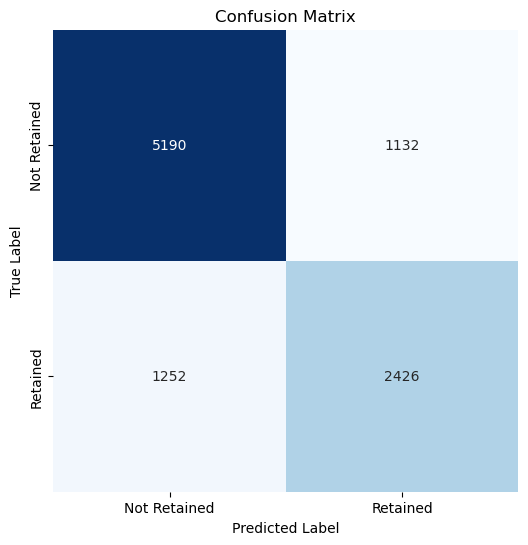

(0.7616, 0.6818437324339517, 0.6595976073953236, 0.6705362078496407)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Retained', 'Retained'], yticklabels=['Not Retained', 'Retained'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

accuracy, precision, recall, f1

The performance of the random forest classifier is as follows:

- Accuracy: 0.7616
- Precision: 0.6818
- Recall: 0.6596
- F1 Score: 0.6705

The confusion matrix visually represents these results.

Accuracy is the overall correctness of the model, calculated as the number of correct predictions divided by the total number of predictions.

Precision is the ratio of correctly predicted positive observations to the total predicted positives. High precision relates to the low false positive rate.

Recall (Sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class.

The F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

The model's accuracy is reasonably good, with around 76% of predictions being correct. The precision, recall, and F1 score are all around 0.67, indicating that the model is somewhat balanced in terms of false positives and false negatives.

However, there is room for improvement. We could potentially improve the model by tuning hyperparameters, using more advanced models like gradient boosting machines, or engineering more features. For example, we could create features representing user behavior over time, such as changes in trip frequency or surge usage.

Now, let's discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention. For this, we'll look at the feature importances from the random forest model, which indicate how much each feature contributed to the model's predictions.

In [17]:
# Get feature importances from the random forest model
importances = rf.feature_importances_

# Create a dataframe for visualization
importances_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Sort the dataframe by importance in descending order
importances_df = importances_df.sort_values('importance', ascending=False)

# Display the dataframe
importances_df

,feature,importance
6,avg_dist,0.295901
5,weekday_pct,0.128946
7,avg_rating_by_driver,0.118406
0,trips_in_first_30_days,0.079636
1,avg_rating_of_driver,0.079576
3,surge_pct,0.074746
2,avg_surge,0.071274
8,city_King's Landing,0.064547
11,phone_iPhone,0.036627
4,ultimate_black_user,0.032995


The top five most important features for predicting user retention, according to the random forest model, are:

1. avg_dist: The average distance in miles per trip taken in the first 30 days after signup.
2. weekday_pct: The percent of the user's trips occurring during a weekday.
3. avg_rating_by_driver: The user’s average rating over all of their trips.
4. trips_in_first_30_days: The number of trips this user took in the first 30 days after signing up.
5. avg_rating_of_driver: The average rating of their drivers given by this user.

These factors indicate that both the behavior of the user (such as the number of trips they take and whether those trips are on weekdays) and the experiences they have (such as the average distance of their trips and the ratings they give and receive) are important for predicting whether they will remain active in their 6th month on the system.

Based on these insights, Ultimate could potentially improve long-term rider retention by:

- Encouraging users to take more trips in their first 30 days, perhaps by offering discounts or promotions. According to the model, users who take more trips early on are more likely to be retained.
- Promoting weekday usage. Users who use the service more on weekdays (possibly for commuting) are more likely to be retained.
- Monitoring and improving driver quality. Both the average rating given by the user to drivers and the average rating received by the user from drivers are among the top five predictors of retention. This suggests that positive interactions between drivers and riders can improve retention.
- Ensuring that trips meet users' expectations in terms of distance. Users might use the service for specific types of trips (short local trips vs. longer trips), and meeting these expectations could be key for retention.

It's important to note that these insights are based on a model that could be improved, and that they would need to be tested in practice to confirm their effectiveness. However, they provide a starting point for developing strategies to increase user retention.